# In class exercises for 11.21.2018 (Filtering)

## First import data from eeg_data00.npz

In [1]:
# first import the modules that you'll need. 
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# note would have been better to write these into a single module 
from define_sinc_filter import define_sinc_filter
from apply_filter import apply_filter

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## load eeg_data00.npz...
* you should find that it has three arrays: data, tx, and sr (with 'data' a #trials x # timepoints array containing the EEG data, the time of each data acquisition in tx, and the sample rate stored as sr).  

In [4]:
# load the data...
eeg = np.load('eeg_data00.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 960 trials and 876 timepoints per trial sampled
# at 250Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
# now you can just write data instead of eeg['data'] (and can for tx and sr as well...)

Shape of the big eeg data set:  (960, 876)
Sample rate:  250


## Extract the data from time 0 until time 2000
* hint: you can use boolean indexing by selecting the columns from the 'data' matrix that meet: (tx>=0)  & (tx<2000)
* while you're at it, go ahead and grab the timepoints corresponding to that interval as well

In [5]:
seg_data = data[:,(tx>=0)  & (tx<2000)]
seg_time = tx[(tx>=0) & (tx<2000)]

## Then FFT each trial and take a look at the average power across frequencies
* FFT each trial 
* Then compute the amplitude on each trial
* Then compute the average amplitude across all trials

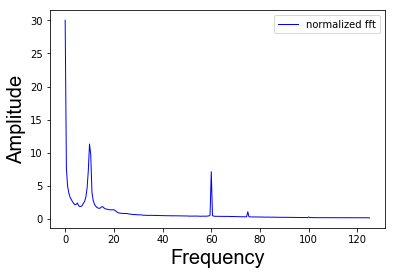

In [6]:
r,c = seg_data.shape

sp = np.fft.rfft(seg_data, axis=1)                    # compute FFT

# compute amplitude
amp = (np.abs(sp) / c) *2

mean_amp = np.mean(amp, axis=0)

# get freq axis
freq = np.fft.rfftfreq(c, 1/sr)   # Sample spacing is 2nd arg

plt.plot(freq, mean_amp, 'b', linewidth=1)          # plot amplitude (power = np.absolute(sp)**2)

plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()

## Noteice that there are two prominent features in the freq domain representation. Make a lp filter that gets rid of power > 20Hz (you'll know if it worked if you get rid of the spike at 60Hz)
* because our apply_filter function isn't optimized to work on matrices (we could do that, but haven't) you will need to loop and apply filter to each trial

In [8]:
fc=0.1
b=0.1
win = 'blackman'
type_filt = 'lp'

# make our function call to generate a hp filter
n, sinc_func = define_sinc_filter(fc=fc, b=b, window=win, type_filt=type_filt)

# filter the signal
filt_sig = np.zeros((r,c))
for i in np.arange(r):
    filt_sig[i,:] = apply_filter(input_sig=seg_data[i,:], input_filter=sinc_func)
    


## Then FFT it again to see if you got rid of the hf components of the signal

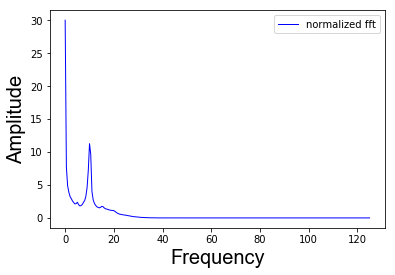

In [9]:
r,c = filt_sig.shape

sp = np.fft.rfft(filt_sig, axis=1)                    # compute FFT

# compute amplitude
amp = (np.abs(sp) / c) *2

mean_amp = np.mean(amp, axis=0)

# get freq axis
freq = np.fft.rfftfreq(c, 1/sr)   # Sample spacing is 2nd arg

plt.plot(freq, mean_amp, 'b', linewidth=1)          # plot amplitude (power = np.absolute(sp)**2)

plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()

## Now design a band pass filter that gets rid of everything outside of the 6-14Hz range (where that big bump is...)
* To design a band pass filter, make a lp filter (with an appropriate fc), then make a hp filter (with an appropriate fc)
* Then multiply them in the frequency domain
* Then multiply the new filter with you data in the frequency domain.
* Then irfft and you should be left with only those frequencies that pass the lp and the hp filters (i.e. a band pass filter)!